# Modelo de Classificação KNN para Iris Dataset

Importando as bibliotecas necessárias:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from distinctipy import distinctipy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

Fazendo a Leitura dos dados:

In [3]:
df_iris = pd.read_csv('iris.data', names=['Sépala Comprimento(cm)', 'Sépala Largura(cm)','Pétala Comprimento(cm)', 'Pétala Largura(cm)', 'Classificação'])
df_iris.head()

,Sépala Comprimento(cm),Sépala Largura(cm),Pétala Comprimento(cm),Pétala Largura(cm),Classificação
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Indexando as éspecies de Iris para a criação do modelo modelo:

In [4]:
indices = {'Iris-setosa' : 0,'Iris-versicolor' : 1, 'Iris-virginica' : 2} # enumerando os tipos de iris

column_idx = df_iris['Classificação'].map(indices) #criando uma coluna com os valores

case_df_indx =  df_iris.assign(idx_class = column_idx) #criando um novo dataframe com a nova coluna 

### Teste para descobrir o melhor valor para K

Para a criação do modelo foi utilizado 80% dos dados para treino e 20% para teste. As espécies foram distribuídas de forma igualitária quantitativamente na divisão dos dados.

In [6]:
train, test = train_test_split(case_df_indx, train_size=0.8, stratify=(case_df_indx.idx_class)) # 80% para treino / 20% para teste, proporcionalmente para cada espécie

X_train = np.array(train.iloc[:,0:4])
X_test = np.array(test.iloc[:,0:4])
y_train = np.array(train['idx_class'])
y_test = np.array(test['idx_class'])

Foi utilizado a validação cruzada, obtendo-se a acurácia, dividindo os dados em 30 partes.
Os modelos foram criados variando o número K entre 1 e 30.

In [12]:
dic_k = {}
for k in range(1,31): #Testando até K 30
    knn_test = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train) # Criando o modelo KNN
    acuracias = cross_val_score(knn_test,
                                case_df_indx.iloc[:,0:4], case_df_indx['idx_class'], cv=30) # Calculando a acurácia para as 30 partes dos dados
    dic_k['K'+str(k)] = acuracias
df_acur = pd.DataFrame(dic_k) 

No histograma abaixo é possível notar que na maior parte das previsões do modelo , K sendo 19, teve sua acurácia mais próxima ou igual a 1. Dessa maneira, se sobressaindo, então para o modelo irei utilizar K  = 19 para o modelo.

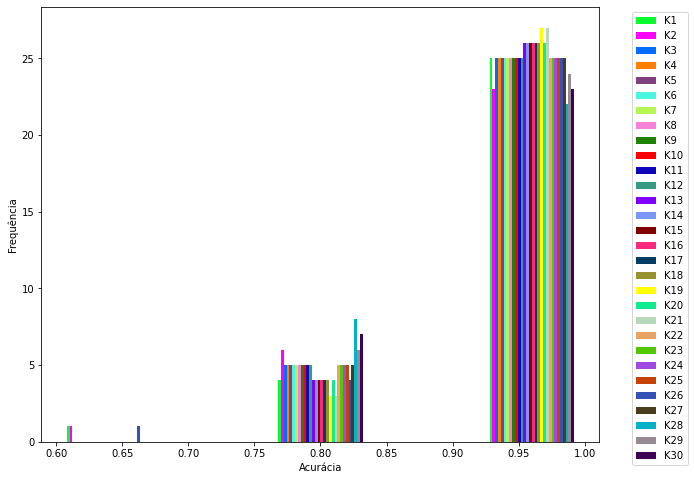

In [11]:
#Plotando histograma do resultado teste
colors = distinctipy.get_colors(30)
plt.figure(figsize=(10,8))
plt.hist(df_acur, 5, density=False, histtype='bar',label=df_acur.columns, color=colors)
plt.ylabel('Frequência')
plt.xlabel('Acurácia')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig('teste.png')
plt.show()

Treinando o modelo com o K escolhido:

In [13]:
knn = KNeighborsClassifier(n_neighbors = 19).fit(X_train, y_train)  # Criando um modelo com o valor de K escolhido

Obtendo a acurácia para os dados teste:

In [15]:
accuracy_knn = knn.score(X_test, y_test)
print("Acurácia para os dados teste: ", accuracy_knn)

Acurácia para os dados teste:  1.0


#### Matriz de confusão

Na matriz de confusão é possível observar que o modelo conseguiu acertar todos os dados separados anteriormente para teste.

In [17]:
knn_predic = knn.predict(X_test) # Fazendo a previsão para os dados teste
cm_knn = confusion_matrix(y_test, knn_predic) # Criando a matriz de confusão
df_conf_mat = pd.DataFrame(cm_knn, columns=indices.keys() , index=indices.keys())
df_conf_mat

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,10,0,0
Iris-versicolor,0,10,0
Iris-virginica,0,0,10


#### Acurácia por espécie

Foi também calculada a acurácia do modelo para todos os dados, mas separado por espécie. A Iris setosa, como já haviamos percebido nos gráficos da análise exploratória, se difere mais das demais nas características aqui observadas tendo um desempenho bem melhor. Já a Iris versicolor e virginica tendo algumas semelhanças nos dados das espécies coletadas, mas apesar disso, continuam com uma acurácia alta. Desta forma o modelo demonstra eficácia no que se propõe.

In [23]:
spc_all = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for spc in spc_all:
    df_spc = case_df_indx[case_df_indx['Classificação'] == spc]
    X_spc = (df_spc.iloc[:,0:4])
    Y_spc = np.array(df_spc['idx_class'])
    accuracy_spc = knn.score(X_spc , Y_spc )
    print("Acurácia para %s: " %spc, accuracy_spc)

Acurácia para Iris-setosa:  1.0
Acurácia para Iris-versicolor:  0.96
Acurácia para Iris-virginica:  0.98
